In [2]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, \
    cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve

In [3]:
dataframe = pd.read_csv('diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.shape

(768, 9)

In [5]:
dataframe.duplicated().sum()

0

In [6]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

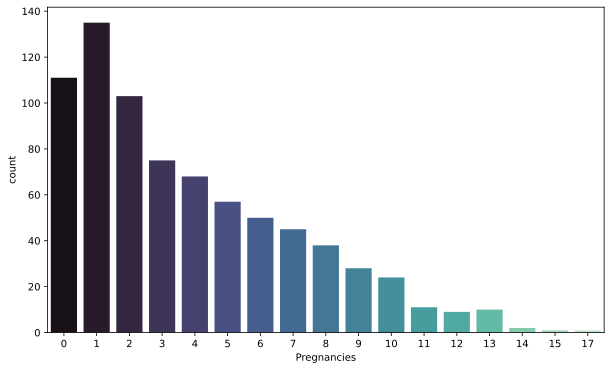

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['Pregnancies'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

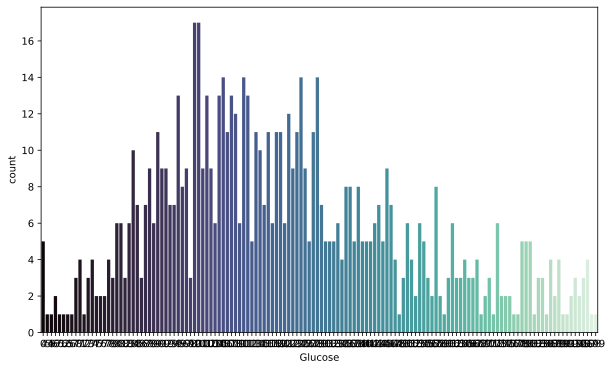

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['Glucose'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

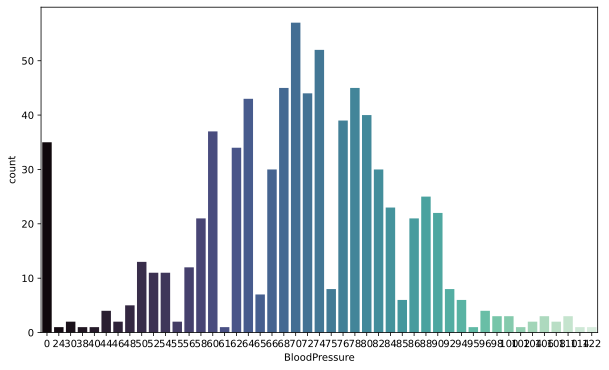

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['BloodPressure'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

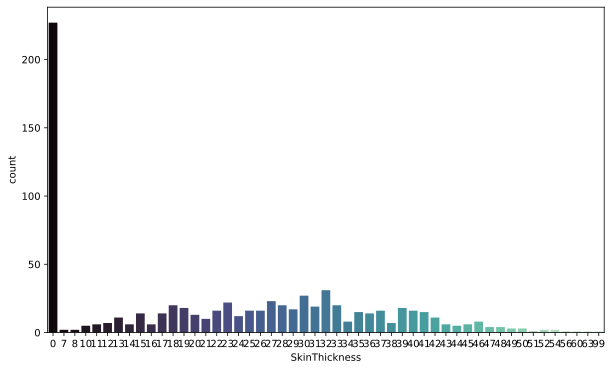

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['SkinThickness'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

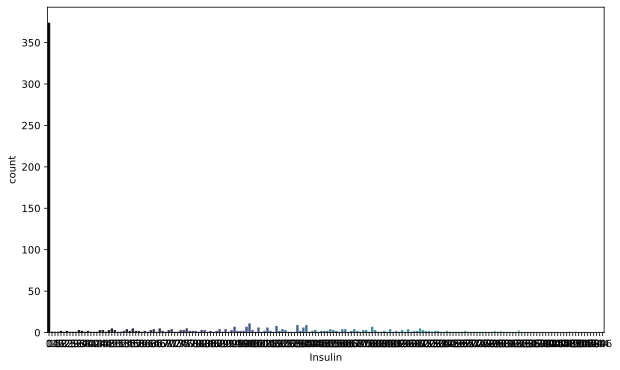

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['Insulin'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

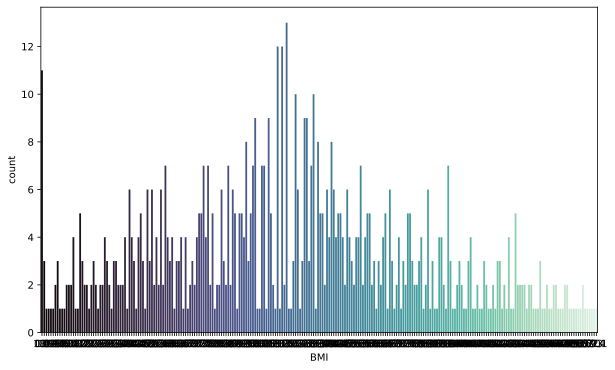

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['BMI'], palette='mako');
plt.savefig('1.png', bbox_inches='tight')

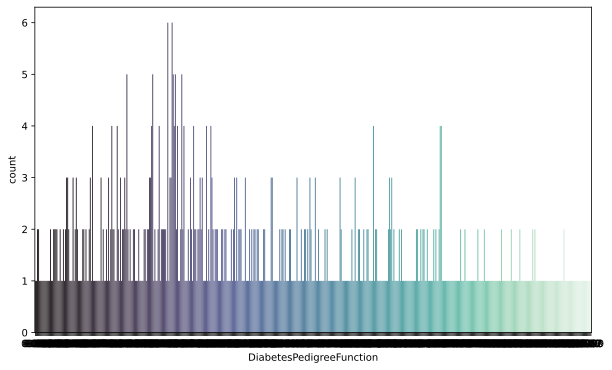

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['DiabetesPedigreeFunction'], palette='mako');

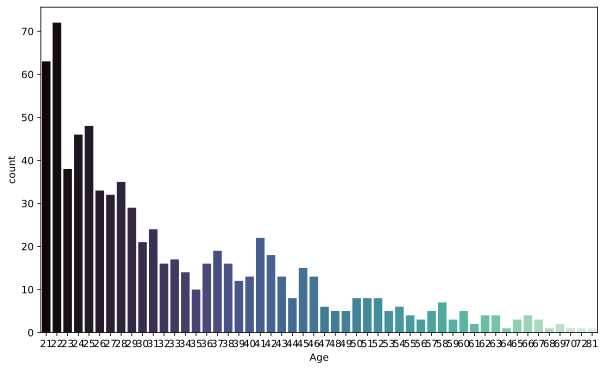

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(dataframe['Age'], palette='mako');

#### Handling zero values

In [15]:
# replace zeros with NAN
dataframe[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataframe[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataframe.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
# imputing NAN values according to their distribution

In [17]:
dataframe['Glucose'].fillna(dataframe['Glucose'].mean(), inplace = True)
dataframe['BloodPressure'].fillna(dataframe['BloodPressure'].mean(), inplace = True)
dataframe['SkinThickness'].fillna(dataframe['SkinThickness'].median(), inplace = True)
dataframe['Insulin'].fillna(dataframe['Insulin'].median(), inplace = True)
dataframe['BMI'].fillna(dataframe['BMI'].median(), inplace = True)

In [18]:
# Now let's divide the data into training and testing with 70-30 ratio
training_data, testing_data = train_test_split(dataframe, test_size=0.3, random_state=37)

In [19]:
training_data.shape

(537, 9)

In [20]:
testing_data.shape

(231, 9)

In [21]:
# Let's checkout the correlations
training_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.086322,0.215176,0.065911,0.003883,0.054622,-0.047264,0.549646,0.213001
Glucose,0.086322,1.000000,0.186564,0.199100,0.434449,0.281788,0.152457,0.206635,0.477703
BloodPressure,0.215176,0.186564,1.000000,0.207179,0.036190,0.323745,-0.002007,0.319236,0.175040
SkinThickness,0.065911,0.199100,0.207179,1.000000,0.166468,0.570095,0.115751,0.086281,0.220837
Insulin,0.003883,0.434449,0.036190,0.166468,1.000000,0.192510,0.149793,0.075193,0.196591
BMI,0.054622,0.281788,0.323745,0.570095,0.192510,1.000000,0.158144,0.060673,0.369553
DiabetesPedigreeFunction,-0.047264,0.152457,-0.002007,0.115751,0.149793,0.158144,1.000000,0.048651,0.168944
Age,0.549646,0.206635,0.319236,0.086281,0.075193,0.060673,0.048651,1.000000,0.216465
Outcome,0.213001,0.477703,0.175040,0.220837,0.196591,0.369553,0.168944,0.216465,1.000000


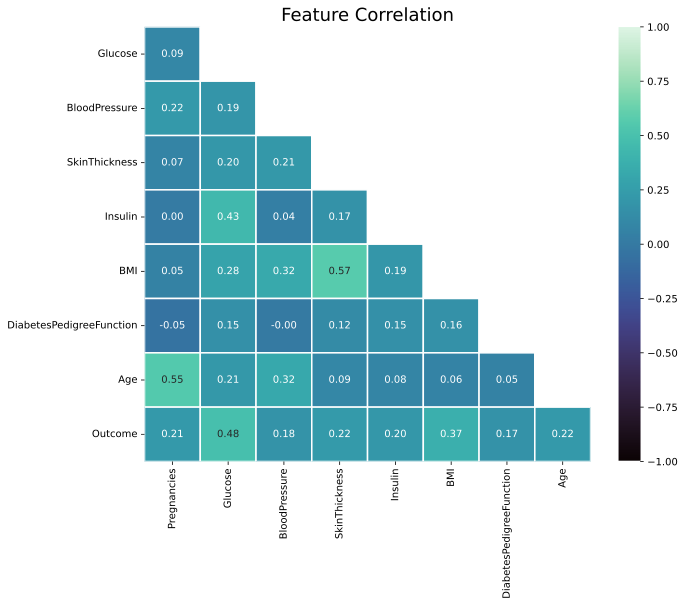

In [75]:
# Drawing the correlation matrix
plt.figure(figsize=(10, 8))

data_corr = training_data.corr()
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

mask = mask[1:, :-1]
corr = data_corr.iloc[1:, :-1].copy()

sns.heatmap(corr, cmap='mako', annot=True, vmin=-1, vmax=1, linewidths=1.5, fmt='.2f', mask=mask)
plt.title('Feature Correlation', loc='center', fontsize=18)
plt.savefig('1.png', bbox_inches='tight')

In [23]:
training_data.Outcome.value_counts()

0    349
1    188
Name: Outcome, dtype: int64

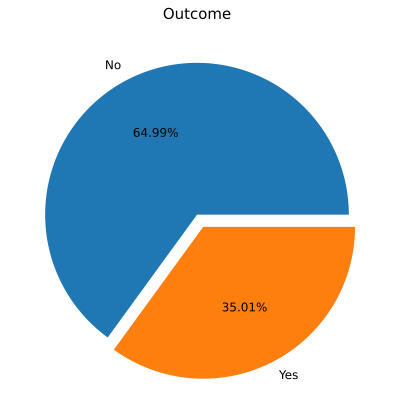

In [24]:
plt.figure(figsize=(7, 7))
plt.pie(x=training_data['Outcome'].value_counts(), autopct='%.2f%%',
        labels=['No', 'Yes'], textprops={'fontsize': 12}, explode=[0, 0.09])
plt.title('Outcome', fontdict={'fontsize': 15});
plt.savefig('1.png', bbox_inches='tight')

Text(0.5, 1.0, 'Pregnancies with Outliers')

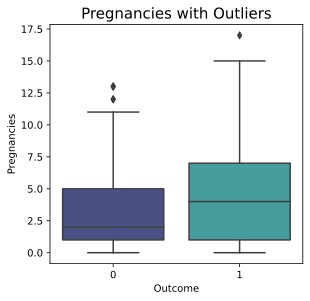

In [25]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='Pregnancies',
            palette='mako', data=training_data.sort_values('Pregnancies', ascending=False))
plt.title('Pregnancies with Outliers', fontsize=15)

Text(0.5, 1.0, 'Glucose with Outliers')

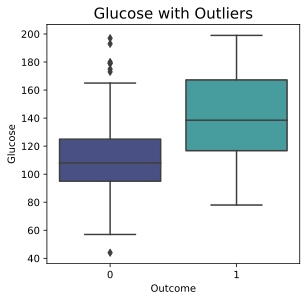

In [26]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='Glucose',
            palette='mako', data=training_data.sort_values('Glucose', ascending=False))
plt.title('Glucose with Outliers', fontsize=15)

Text(0.5, 1.0, 'BloodPressure with Outliers')

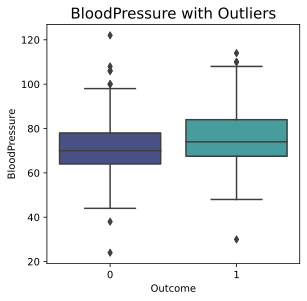

In [27]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='BloodPressure',
            palette='mako', data=training_data.sort_values('BloodPressure', ascending=False))
plt.title('BloodPressure with Outliers', fontsize=15)

Text(0.5, 1.0, 'Insulin with Outliers')

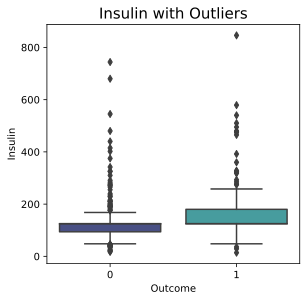

In [28]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='Insulin',
            palette='mako', data=training_data.sort_values('Insulin', ascending=False))
plt.title('Insulin with Outliers', fontsize=15)

Text(0.5, 1.0, 'BMI with Outliers')

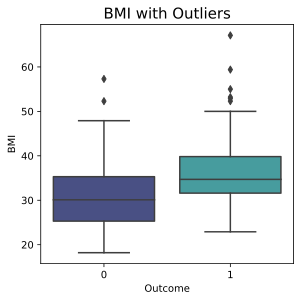

In [29]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='BMI',
            palette='mako', data=training_data.sort_values('BMI', ascending=False))
plt.title('BMI with Outliers', fontsize=15)

Text(0.5, 1.0, 'Age with Outliers')

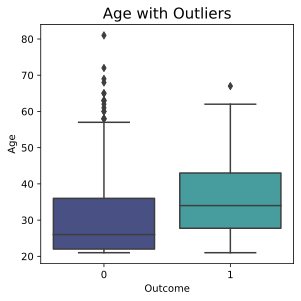

In [30]:
plt.figure(figsize=[10, 15])
plt.subplot(3, 2, 1)
sns.boxplot(x='Outcome', y='Age',
            palette='mako', data=training_data.sort_values('Age', ascending=False))
plt.title('Age with Outliers', fontsize=15)

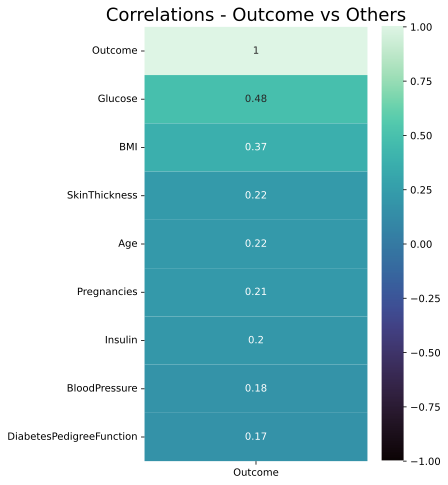

In [31]:
# Plotting the correlation
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(training_data.corr()[
                          ['Outcome']].sort_values(by='Outcome', ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap='mako')
plt.title('Correlations - Outcome vs Others', loc='center', fontsize=18)
plt.savefig('1.png', bbox_inches='tight')

In [32]:
training_data_x = training_data[
    ['Glucose', 'BMI', 'SkinThickness', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure']]
testing_data_x = testing_data[
    ['Glucose', 'BMI', 'SkinThickness', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure']]
training_data_y = training_data[['Outcome']]
testing_data_y = testing_data[['Outcome']]

##### Logistic Regression

In [33]:
model = sm.OLS(training_data_y, training_data_x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                              65.94
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                    1.37e-74
Time:                        10:29:31   Log-Likelihood:                         -294.43
No. Observations:                 537   AIC:                                      604.9
Df Residuals:                     529   BIC:                                      639.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Glucose                      0.0046      0.001      6.829      0.000       0.003       0.006
BMI                          0.0117      0.003      3.658      0.000       0.005       0.018
SkinThickness               -0.0029      0.003     -1.120      0.263      -0.008       0.002
Age                         -0.0005      0.002     -0.251      0.802      -0.004       0.003
Pregnancies                  0.0268      0.006      4.131      0.000       0.014       0.039
DiabetesPedigreeFunction     0.0768      0.055      1.398      0.163      -0.031       0.185
Insulin                     -0.0001      0.000     -0.544      0.587      -0.001       0.000
BloodPressure               -0.0082      0.001     -5.956      0.000      -0.011      -0.006
==============================================================================
Omnibus:                      165.699   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.768
Skew:                           0.516   Prob(JB):                     2.57e-11
Kurtosis:                       1.945   Cond. No.                         668.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Performing a grid search
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'class_weight': [{0: 0, 0: 0.01, 0: 0.1, 0: 0.5, 0: 1, 0: 10, 0: 2}]}
grid_cross_validate = GridSearchCV(LogisticRegression(), param_grid=params, scoring='f1', cv=5)
grid_cross_validate.fit(training_data_x, training_data_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 2}]},
             scoring='f1')

In [35]:
grid_cross_validate.best_params_, grid_cross_validate.best_score_

({'C': 10, 'class_weight': {0: 2}}, 0.5334200570783832)

In [36]:
# Performing a normal logistic regression with K-fold validation
logistic_regression = LogisticRegression(C=0.001, solver='liblinear')
k_fold = KFold(n_splits=10, random_state=37, shuffle=True)
cv_score = cross_val_score(logistic_regression, training_data_x, training_data_y, scoring='f1', cv=k_fold)

In [37]:
cv_score, cv_score.mean()

(array([0.34482759, 0.44444444, 0.37037037, 0.46153846, 0.57142857,
        0.21428571, 0.52941176, 0.38709677, 0.48484848, 0.5625    ]),
 0.43707521720223746)

In [38]:
# Performing a balanced logistic regression
logistic_regression_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
cv_score_balanced = cross_val_score(logistic_regression_balanced, training_data_x, training_data_y, scoring='f1',
                                    cv=k_fold)

In [39]:
cv_score_balanced, cv_score_balanced.mean()

(array([0.47368421, 0.61538462, 0.68421053, 0.76      , 0.68571429,
        0.56410256, 0.74418605, 0.68181818, 0.57142857, 0.8372093 ]),
 0.6617738304127533)

In [40]:
# Performing a weighted logistic regression
logistic_regression_weighted = LogisticRegression(C=0.001, class_weight={0: 2, 1: 1}, solver='liblinear')
cv_score_weighted = cross_val_score(logistic_regression_weighted, training_data_x, training_data_y, scoring='f1',
                                    cv=k_fold)

In [41]:
cv_score_weighted, cv_score_weighted.mean()

(array([0.27272727, 0.23529412, 0.09090909, 0.15384615, 0.28571429,
        0.10526316, 0.30769231, 0.24      , 0.16      , 0.25      ]),
 0.21014463864309066)

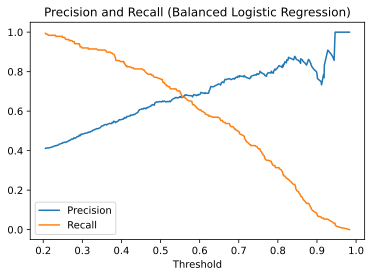

In [76]:
# Balanced logistic regression model is the best
logistic_regression_balanced.fit(training_data_x, training_data_y)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(training_data_y,
                                                                        logistic_regression_balanced.predict_proba(
                                                                            training_data_x)[:, 1])
plt.plot(threshold_curve, precision_curve[1:], label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall (Balanced Logistic Regression)')
plt.savefig('1.png', bbox_inches='tight')

In [43]:
prediction_y = (logistic_regression_balanced.predict_proba(training_data_x)[:, 1] >= 0.56)

In [44]:
precision_score(training_data_y, prediction_y), recall_score(training_data_y, prediction_y)

(0.6737967914438503, 0.6702127659574468)

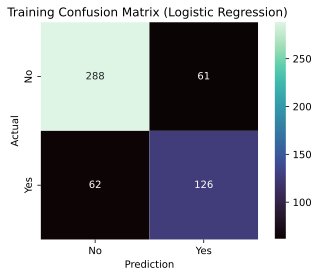

In [45]:
confusion_mtx = confusion_matrix(training_data_y, prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Training Confusion Matrix (Logistic Regression) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [46]:
cv_prediction_y = cross_val_predict(logistic_regression_balanced, X = training_data_x, y = training_data_y, cv=5)

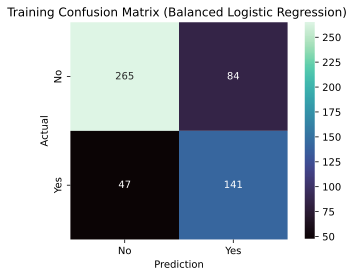

In [47]:
confusion_mtx = confusion_matrix(training_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Training Confusion Matrix (Balanced Logistic Regression) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [48]:
accuracy_score(training_data_y, cv_prediction_y)

0.7560521415270018

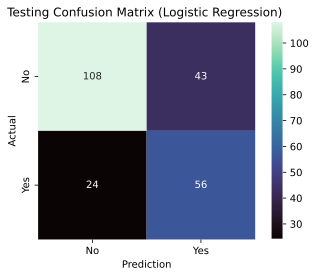

In [49]:
cv_prediction_y = cross_val_predict(logistic_regression_balanced, X = testing_data_x, y = testing_data_y, cv=5)
confusion_mtx = confusion_matrix(testing_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Testing Confusion Matrix (Logistic Regression) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [50]:
accuracy_score(testing_data_y, cv_prediction_y)

0.70995670995671

##### K Nearest Neighbors

In [51]:
k_range = list(range(3,15))
param_grid = dict(n_neighbors=k_range)
cv_grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv = 5)
cv_grid.fit(training_data_x, training_data_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14]},
             scoring='f1')

In [52]:
cv_grid.best_estimator_, cv_grid.best_score_

(KNeighborsClassifier(n_neighbors=9), 0.6349872691526735)

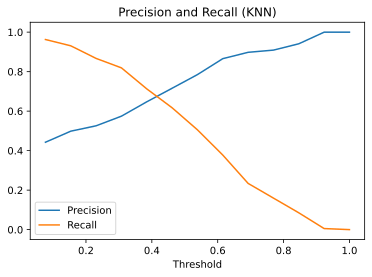

In [77]:
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(training_data_x, training_data_y)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(training_data_y,
                                                                        knn.predict_proba(
                                                                            training_data_x)[:, 1])
plt.plot(threshold_curve, precision_curve[1:], label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall (KNN)')
plt.savefig('1.png', bbox_inches='tight')

In [54]:
cv_prediction_y = (cv_grid.predict_proba(training_data_x)[:, 1] >= 0.42)
precision_score(training_data_y, cv_prediction_y), recall_score(training_data_y, cv_prediction_y)

(0.6375545851528385, 0.776595744680851)

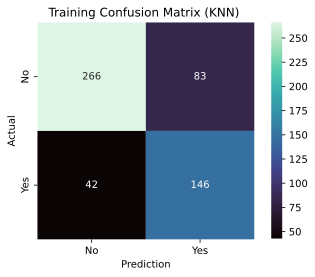

In [55]:
confusion_mtx = confusion_matrix(training_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Training Confusion Matrix (KNN) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [56]:
accuracy_score(training_data_y, cv_prediction_y)

0.7672253258845437

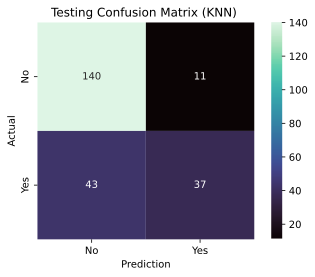

In [57]:
cv_prediction_y = (cv_grid.predict_proba(testing_data_x)[:, 1] >= 0.57)
confusion_mtx = confusion_matrix(testing_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Testing Confusion Matrix (KNN) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [58]:
accuracy_score(testing_data_y, cv_prediction_y)

0.7662337662337663

##### Decision Tree

In [59]:
tree_param = {'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

cv_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param,scoring='f1',cv=5,n_jobs=-1)
cv_grid.fit(training_data_x, training_data_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='f1')

In [60]:
cv_grid.best_score_, cv_grid.best_params_

(0.673599006162373, {'criterion': 'gini', 'max_depth': 4})

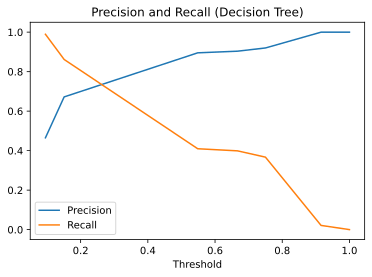

In [78]:
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='gini')
decision_tree.fit(training_data_x, training_data_y)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(training_data_y,
                                                                        decision_tree.predict_proba(
                                                                            training_data_x)[:, 1])
plt.plot(threshold_curve, precision_curve[1:], label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall (Decision Tree)')
plt.savefig('1.png', bbox_inches='tight')

In [62]:
cv_prediction_y = (cv_grid.predict_proba(training_data_x)[:, 1] >= 0.35)
precision_score(training_data_y, cv_prediction_y), recall_score(training_data_y, cv_prediction_y)

(0.6736401673640168, 0.8563829787234043)

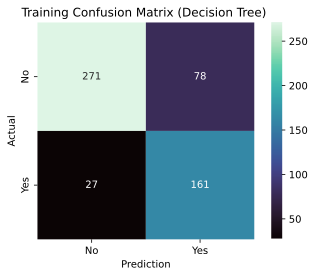

In [63]:
confusion_mtx = confusion_matrix(training_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Training Confusion Matrix (Decision Tree) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [64]:
accuracy_score(training_data_y, cv_prediction_y)

0.8044692737430168

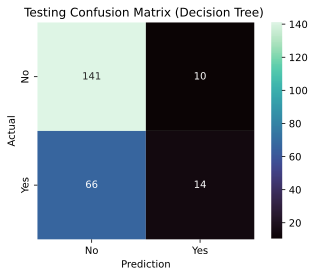

In [65]:
cv_prediction_y = (cv_grid.predict_proba(testing_data_x)[:, 1] >= 0.57)
confusion_mtx = confusion_matrix(testing_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Testing Confusion Matrix (Decision Tree) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [66]:
accuracy_score(testing_data_y, cv_prediction_y)

0.670995670995671

##### Random Forest

In [67]:
rf_param = {'criterion':['gini','entropy'],
            'bootstrap': [True, False],
              'n_estimators':[2, 5, 10, 50, 100, 120, 135, 150, 175, 200]}

cv_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_param,scoring='f1',cv=5,n_jobs=-1)
cv_grid.fit(training_data_x, training_data_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [2, 5, 10, 50, 100, 120, 135, 150, 175,
                                          200]},
             scoring='f1')

In [68]:
cv_grid.best_score_, cv_grid.best_params_

(0.6573594721482046,
 {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100})

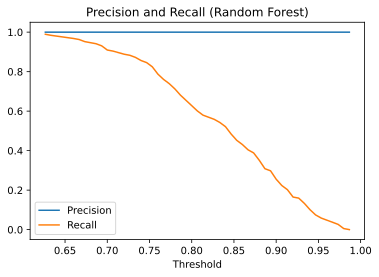

In [79]:
random_forest = RandomForestClassifier(n_estimators=150, bootstrap=True, criterion='gini')
random_forest.fit(training_data_x, training_data_y)
precision_curve, recall_curve, threshold_curve = precision_recall_curve(training_data_y,
                                                                        random_forest.predict_proba(
                                                                            training_data_x)[:, 1])
plt.plot(threshold_curve, precision_curve[1:], label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall (Random Forest)')
plt.savefig('1.png', bbox_inches='tight')

In [70]:
cv_prediction_y = (cv_grid.predict_proba(training_data_x)[:, 1] >= 0.5)
precision_score(training_data_y, cv_prediction_y), recall_score(training_data_y, cv_prediction_y)

(1.0, 1.0)

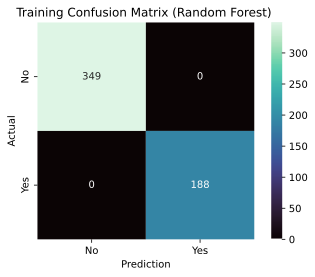

In [71]:
confusion_mtx = confusion_matrix(training_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Training Confusion Matrix (Random Forest) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [72]:
accuracy_score(training_data_y, cv_prediction_y)

1.0

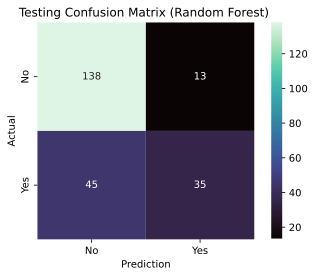

In [73]:
cv_prediction_y = (cv_grid.predict_proba(testing_data_x)[:, 1] >= 0.6)
confusion_mtx = confusion_matrix(testing_data_y, cv_prediction_y)

sns.heatmap(confusion_mtx , cmap = 'mako', annot = True , square = True , fmt = 'd',
           xticklabels = ['No','Yes'],
           yticklabels = ['No','Yes'])
plt.title('Testing Confusion Matrix (Random Forest) ',fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [74]:
accuracy_score(testing_data_y, cv_prediction_y)

0.7489177489177489